In [98]:
from pippi.soundbuffer import SoundBuffer
from pippi import dsp,fx
import numpy as np
import pandas as pd
import sounddevice as sd
import helpers as hp
import param_generation as pg
import _pickle as pickle
from IPython.display import Audio
sr=44100


'9PKT'

{'oscType': 2, 'isNoise': 1, 'A': 3, 'D': 3, 'S': 1, 'R': 1, 'pitch_0': 86, 'pitch_1': 0, 'pitch_2': 16, 'pitch_3': 64, 'bpCutLow': 116, 'bpCutHigh': 116, 'bpOrder': 2, 'amplitude': 2, 'start': 7, 'length': 0}
0.048505541652748445
{'oscType': 0, 'isNoise': 0, 'A': 0, 'D': 1, 'S': 0, 'R': 1, 'pitch_0': 110, 'pitch_1': 108, 'pitch_2': 56, 'pitch_3': 32, 'bpCutLow': 18, 'bpCutHigh': 77, 'bpOrder': 2, 'amplitude': 0, 'start': 1, 'length': 1}
1.7171607715884665e-10
{'oscType': 0, 'isNoise': 1, 'A': 0, 'D': 1, 'S': 2, 'R': 1, 'pitch_0': 104, 'pitch_1': 68, 'pitch_2': 96, 'pitch_3': 96, 'bpCutLow': 102, 'bpCutHigh': 117, 'bpOrder': 2, 'amplitude': 0, 'start': 7, 'length': 1}
0.048505541652748445
{'oscType': 0, 'isNoise': 0, 'A': 3, 'D': 3, 'S': 2, 'R': 2, 'pitch_0': 8, 'pitch_1': 68, 'pitch_2': 88, 'pitch_3': 112, 'bpCutLow': 8, 'bpCutHigh': 95, 'bpOrder': 1, 'amplitude': 3, 'start': 4, 'length': 0}
0.0001800573573229148
{'oscType': 0, 'isNoise': 1, 'A': 3, 'D': 2, 'S': 1, 'R': 3, 'pitch_0': 

<Figure size 576x360 with 0 Axes>

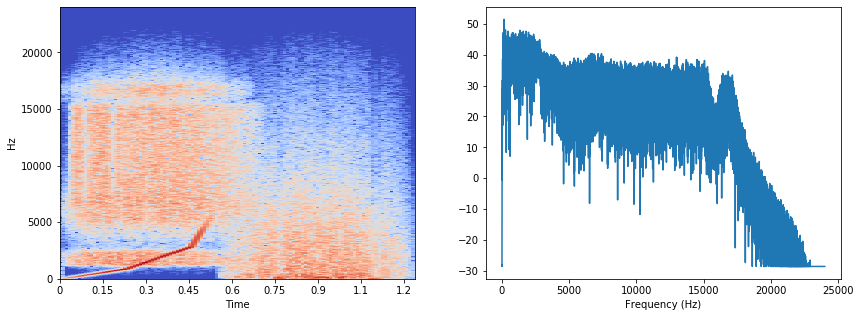

In [99]:
%%time
#generate 1 sound
import imp
imp.reload(pg)
imp.reload(hp)

out = dsp.buffer(length=1,channels=1)
params=[]
stack_num=np.random.choice([1,4,8])
for i in range(stack_num): 
    p=pg.RandomParams()
    print(vars(p))
    print(p.getStart())
    s=pg.Synth(p)
    out.dub(s.buff,p.getStart())
    params.append(p)
out=fx.norm(out,1)
hp.specShow(out)
Audio(hp.memToAud(out),rate=sr, autoplay=True)


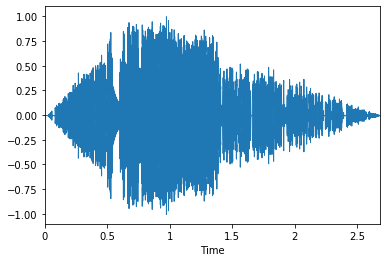

In [43]:
import librosa
librosa.display.waveplot(hp.memToAud(out))

In [ ]:
%%time
#generate a lot of sounds
import imp
imp.reload(pg)
imp.reload(hp)

for j in range(5000):
    out = dsp.buffer(length=1,channels=1)
    params=[]
    stack_num=np.random.choice([1,4,16,32])
    for i in range(stack_num): 
        p=pg.RandomParams()
        s=pg.Synth(p)
        out.dub(s.buff,p.start)
        params.append(p)
    out=fx.norm(out,1)    
    out.write("generations/%d-%d-%s.wav"%(j,stack_num,hp.string_generator()))
#     with open("generations/pickles/%d.pkl"%j, 'wb') as pfile:
#         pickle.dump(params,pfile,-1)

In [22]:
### test to see if pickle works
with open("generations/5_stack/pickles/1.pkl", 'rb') as pfile:
    params=pickle.load(pfile)
out = dsp.buffer(length=1,channels=1)
for p in params: 
    s=pg.Synth(p)
    out.dub(s.buff,p.start)
out=fx.norm(out,1)  
sd.play(out,blocking=True)

###actual sound
import librosa as lb
y,sr=lb.core.load("generations/5_stack/sounds/1.wav")
sd.play(y,samplerate=sr)